In [1]:
import numpy as np
np.random.seed(42)
m=1000
X=5*np.random.rand(m,1)-2.5
y=np.sin(X)*100+np.random.randn(m,1)

1)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [3]:
X_scaled=scaler.fit_transform(X)

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

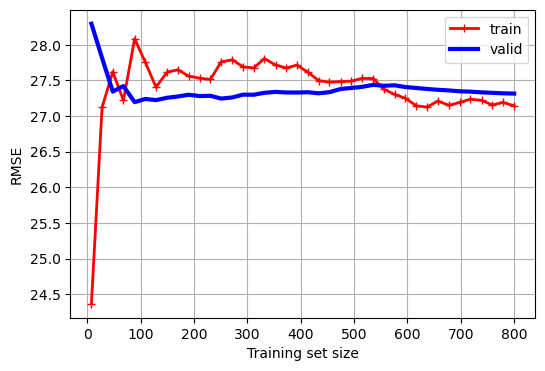

In [46]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4)) 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0,800,20,30])

plt.show()

As we can see from the learning curve the linear model is underfitting because from the start the RMSE is quite high, then due to noise and non linearity of the data it can not generalize well and that is the reason the training error increases until it reaches a plateau. The validation error as we can see is big at first, because the model can not generalize on very few instances.Then as we add more training instances the validation error decreases a little, however a linear model can not fit non linear data well thats why validation error also reaches a plateau. 

2)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_features = PolynomialFeatures(degree=50, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [10]:
X_poly_scaled=scaler.fit_transform(X_poly)

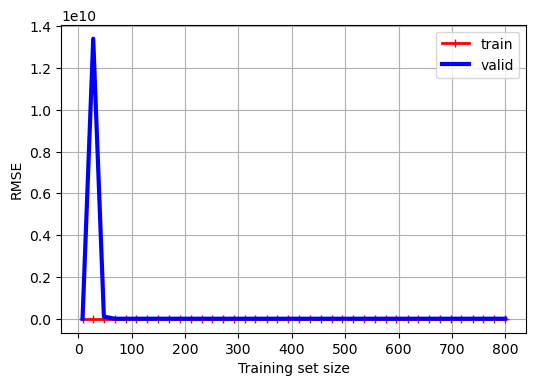

In [52]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_poly_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0, 800, 1.5, 100])


plt.show()

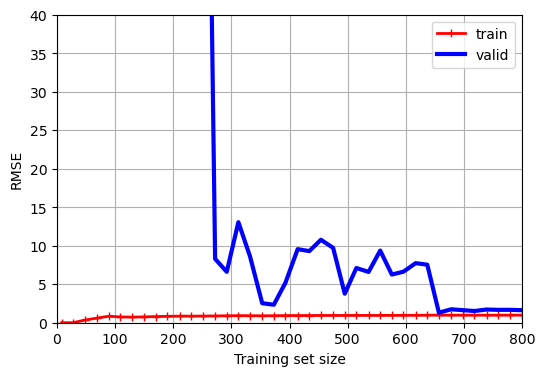

In [35]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_poly_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")


plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 800, 0, 40])


plt.show()

3)

In [16]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.001, solver="cholesky")

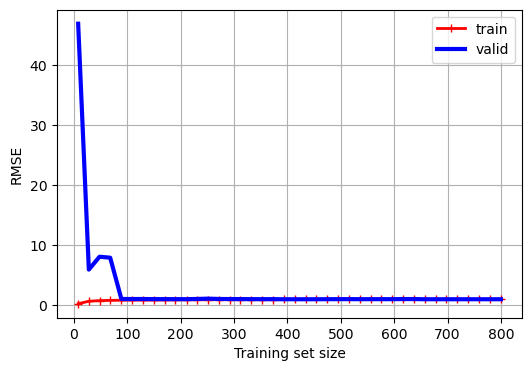

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    ridge_reg, X_poly_scaled, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([0, 800,0, 40])

plt.show()

In the first plot, we see that the LR model is underfitting as both errors reach a plateau and the model can not generalize on unseen data due to non linearity and noise.
In the second plot we see that the model clearly overfits due to non existent training error. The model fits the training data almost perfectly as the polynomial degree is very large, also the validation error is big at the beggining but slowly becomes the same as the training error.
In the third plot we see that Ridge Regression reduces overfitting by penalizing large coefficients of the polynomial terms.The training error will slightly increase compared to unregularized polynomial regression because the model is constrained by regularization.The validation error will decrease significantly, showing better generalization to unseen data.

4)

In [19]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(lin_reg, X_scaled, y, cv=10,scoring="neg_root_mean_squared_error");cross_val

array([-27.56030697, -27.22561853, -28.25715517, -28.24648639,
       -28.83146371, -27.23333085, -25.67146935, -25.09122868,
       -27.35483791, -26.93440813])

In [20]:
rmse_LR_mean=-cross_val.mean();rmse_LR_mean

27.240630567902237

In [21]:
rmse_LR_std=cross_val.std();rmse_LR_std

1.089371417548193

5)

In [22]:
cross_val_poly=cross_val_score(lin_reg, X_poly_scaled, y, cv=10, scoring='neg_root_mean_squared_error');cross_val_poly

array([-0.98457252, -1.0736576 , -0.97735338, -1.17791792, -1.01999891,
       -6.03481068, -0.98088621, -1.11714146, -1.04471275, -0.98014625])

In [23]:
rmse_poly_mean=-cross_val_poly.mean();rmse_poly_mean

1.5391197674771713

In [24]:
rmse_poly_std=cross_val_poly.std();rmse_poly_std

1.4999176401343826

6)

In [25]:
cross_val_ridge=cross_val_score(ridge_reg, X_poly_scaled, y, cv=10, scoring='neg_root_mean_squared_error');cross_val_ridge

array([-0.89403482, -0.99598476, -0.97278928, -1.09832669, -0.97416559,
       -0.99137055, -0.93800159, -1.08237491, -1.05605303, -0.93615578])

In [26]:
rmse_ridge_mean=-cross_val_ridge.mean();rmse_ridge_mean

0.9939256987697496

In [27]:
rmse_ridge_std=cross_val_ridge.std();rmse_ridge_std

0.06314560262803784

7)

The result from questions 4,5,6 verify the learning curves that we found. In Linear Regression model the RMSE is very high and the model underfits as shown in the learning curve of question 1. In the polynomial model we have lower RMSE than the linear model but as we show the model overfits due to the high polynomial degree. The training error is almost 0 and the validation error arround 1.5, that is also verrified from the high standard diviation which translates to high variance meaning that the model overfits. Finally with ridge regression  the validation RMSE is closer to training RMSE leading to better generalization and better RMSE values.Also the variance is much lower in comparison with the polynomial model which means that the model does not overfit.